# NLP Milestone 1
A notebook to preprocess youtube transcripts of Al Mokhbir Al Eqtsadi episodes.

In [19]:
# imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re 
import pyarabic.araby as araby
from nltk.corpus import stopwords
import nltk

### 1. Data Loading

In [20]:
def read_episodes_files(file_path: str) -> pd.DataFrame:
    """
    Read all the episodes files in the file_path and return a DataFrame with the content of the files.
    """
    episodes_files = []
    for file in os.listdir(file_path):
        if file.endswith(".txt"):
            with open(file_path + file, 'r') as f:
                episodes_files.append(f.read())
    df = pd.DataFrame(episodes_files, columns=['episode_transcript'])
    return df

In [21]:
df = read_episodes_files('Al_Mokhbir_Al_Eqtisadi/raw_data/')
df.head()

episode_transcript
0  بعد سبعه اشهر وانا لا اجرؤ على حذف شيء\nيخصك م...
1  عمان وقطر والبحرين والسعوديه دي هي الدول\nالعر...
2  على غير العادة وبدون أي مقدمات\nخلونا نبدأ الح...
3  من حوالي السنتين\nوتحديداً في 3 ديسمبر 2020\nج...
4  يوم 8 سبتمبر 2022\nتم إعلان وفاة ملكة بريطانيا...

### 2. Data Understanding

In [22]:
# View number of samples
df.shape

(222, 1)

In [23]:
# View average transcript length 
df['episode_transcript'].apply(len).mean()

14161.801801801801

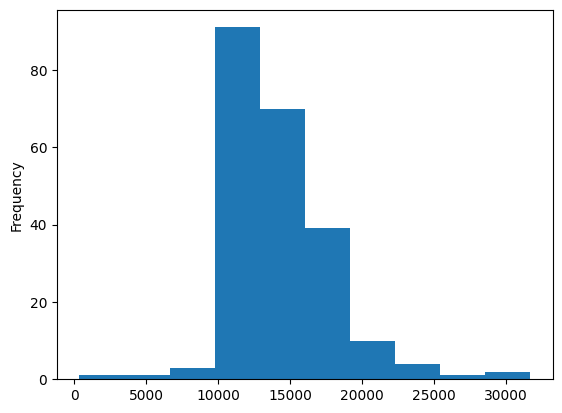

In [24]:
# View the histogram of transcript lengths
df['episode_transcript'].apply(len).plot(kind='hist')
plt.show()

In [25]:
# View a couple of samples
print(df.values[0][0])

بعد سبعه اشهر وانا لا اجرؤ على حذف شيء
يخصك ما اليوم ازيل تطبيقات الالعاب التي
حملتم على جهازي اخرج من المجموعات
التعليميه الخاصه بكما الغي متابعتي لكل
صفحه اراها امامي تعرض ملابس الاطفال
والعابهم لم يكن قتلكم كابوسا كما ظننت بل
كان افضع حقيقه هي قصه ام من امهات غزه
خسرت اطفالها هي قصه من 15000 قصه لاكثر
من 15000 طفل قتلهم الاحت خلوا عينكم على
غزه خلوا عينكم على رفاح



In [26]:
# Check if there are any missing values
df.isna().sum()

episode_transcript    0
dtype: int64

In [27]:
# Check if there are any duplicates
df.duplicated().sum()

0

In [28]:
# Check if there are very short or very long transcripts
df['transcript_length'] = df['episode_transcript'].apply(len)
df['transcript_length'].describe()

count      222.000000
mean     14161.801802
std       3645.946027
min        370.000000
25%      11721.250000
50%      13418.500000
75%      16070.500000
max      31704.000000
Name: transcript_length, dtype: float64

<Axes: ylabel='Frequency'>

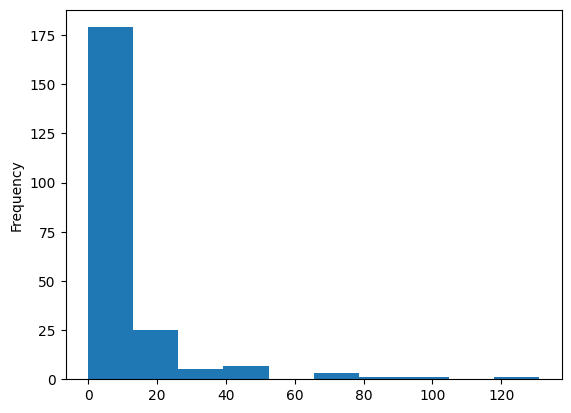

In [29]:
def count_non_arabic_words(text: str) -> int:
    """
    Count the number of non-arabic words in a text, that are also not a number
    """
    non_arabic_words = 0
    for word in text.split():
        if re.search(r'[a-zA-Z]', word):
            non_arabic_words += 1
    return non_arabic_words

# Apply the function on the DataFrame
df['non_arabic_words_count'] = df['episode_transcript'].apply(count_non_arabic_words)

# Plot the distribution of non-arabic words
df['non_arabic_words_count'].plot(kind='hist')

It can seen from the histogram that `Al Mokhbir Al Eqtisadi` uses small number of english phrases in his episodes

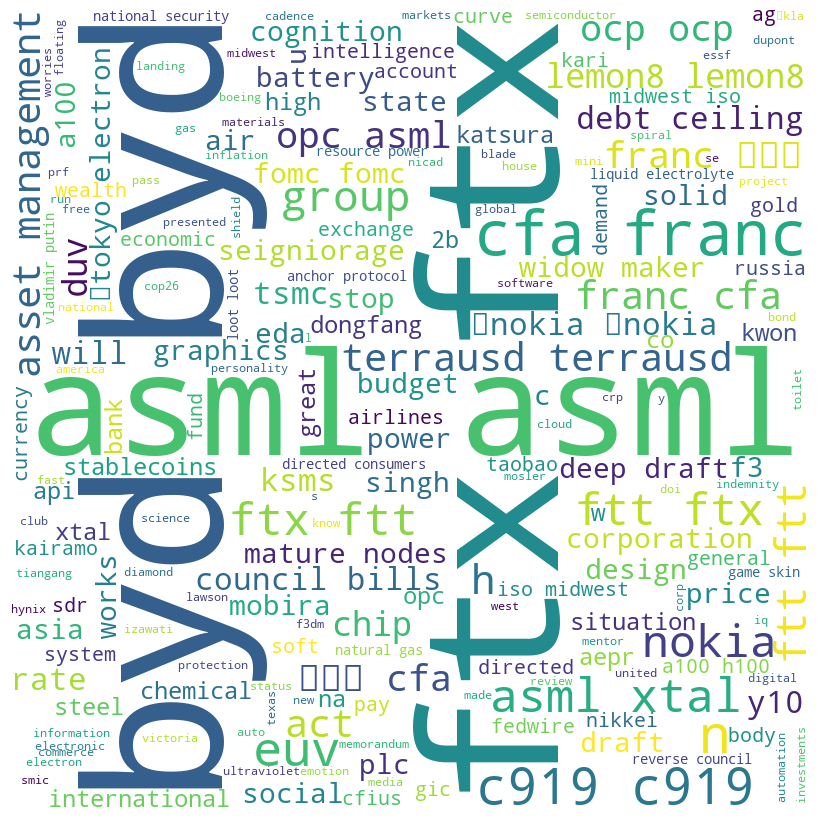

In [30]:
# Plot word cloud for the most common non-arabic words
from wordcloud import WordCloud

# Create a word cloud for the most common non-arabic words
non_arabic_words = ' '.join(df['episode_transcript'].apply(lambda x: ' '.join([word.lower() for word in x.split() if re.search(r'[a-zA-Z]', word)])))

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(non_arabic_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

It can be seen from the above word cloud that most of the english phrases used are
1. Company Names
2. Country Names
3. Buisness Expressions 
and others

### 3. Data Preprocessing & Cleaning

In [31]:
# Cleaning function
nltk.download('stopwords')
arabic_stopwords = set(stopwords.words('arabic'))

def clean_arabic_txt(text: str) -> str:
    """
    Clean the Arabic text by removing any non-Arabic characters, special tags, timestamps, and stopwords.
    """
    text = re.sub(r'\[\d{2}:\d{2}:\d{2}\]', '', text)  # Remove timestamps
    text = re.sub(r'\[.*?\]', '', text) # Remove special tags like [موسيقى], [ضحك], etc.
    text = araby.strip_tashkeel(text) 
    text = araby.strip_tatweel(text) 
    text = text.strip()
    text = ' '.join([word for word in text.split() if word not in arabic_stopwords])
    return text

# Apply the cleaning function
df['cleaned_transcript'] = df['episode_transcript'].apply(clean_arabic_txt)
df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\001\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


episode_transcript  transcript_length  \
0  بعد سبعه اشهر وانا لا اجرؤ على حذف شيء\nيخصك م...                370   
1  عمان وقطر والبحرين والسعوديه دي هي الدول\nالعر...              18330   
2  على غير العادة وبدون أي مقدمات\nخلونا نبدأ الح...              16159   
3  من حوالي السنتين\nوتحديداً في 3 ديسمبر 2020\nج...              12659   
4  يوم 8 سبتمبر 2022\nتم إعلان وفاة ملكة بريطانيا...              11463   

   non_arabic_words_count                                 cleaned_transcript  
0                       0  سبعه اشهر وانا اجرؤ حذف شيء يخصك اليوم ازيل تط...  
1                       0  عمان وقطر والبحرين والسعوديه دي الدول العربيه ...  
2                       2  العادة وبدون مقدمات خلونا نبدأ الحلقة وندخل ال...  
3                      41  حوالي السنتين وتحديدا 3 2020 جون راتكليف مدير ...  
4                      22  يوم 8 2022 تم إعلان وفاة ملكة بريطانيا إليزبيث...

In [32]:
print(df.values[0][2])

0


#### Tokenization

In [37]:
from farasa.segmenter import FarasaSegmenter
from typing import List
from tqdm.notebook import tqdm

def tokenize(episodes: List[str]) -> List[List[str]]:
    """
    Tokenize a list of Arabic text strings using Farasa and clean the tokens.

    Args:
    - episodes (list of str): List of strings to be tokenized.

    Returns:
    - List of Lists: Cleaned and tokenized text for each episode.
    """
    farasa_segmenter = FarasaSegmenter(interactive=True)

    tokenized_episodes = []    
    for episode in tqdm(episodes):
        segmented_episode = farasa_segmenter.segment(episode)
        episode_split = segmented_episode.split()
        episode_tokenized = []
        for word in episode_split:
            if '+' in word:
                word_split = word.split('+')
                episode_tokenized.extend(word_split)
            else:
                episode_tokenized.append(word)
        tokenized_episodes.append(episode_tokenized)

    return tokenized_episodes


In [38]:
episodes = df['cleaned_transcript'].values.tolist()
cleaned_tokenized = tokenize(episodes=episodes)
df['tokenized_transcript'] = cleaned_tokenized
print(cleaned_tokenized)

[2025-02-23 01:00:09,357 - farasapy_logger - WARNING]: Be careful with large lines as they may break on interactive mode. You may switch to Standalone mode for such cases.


  0%|          | 0/222 [00:00<?, ?it/s]

[['سبع', 'ه', 'أشهر', 'و', 'أنا', 'اجرؤ', 'حذف', 'شيء', 'يخصك', 'ال', 'يوم', 'ازيل', 'تطبيق', 'ات', 'ال', 'ألعاب', 'حملتم', 'جهاز', 'ي', 'أخرج', 'ال', 'مجموع', 'ات', 'ال', 'تعليميه', 'الخاص', 'ه', 'ال', 'غي', 'متابع', 'ت', 'ي', 'ل', 'كل', 'صفح', 'ه', 'ارا', 'ها', 'امامي', 'تعرض', 'ملابس', 'ال', 'أطفال', 'و', 'العاب', 'هم', 'يكن', 'قتل', 'كم', 'كابوس', 'ا', 'ظنن', 'ت', 'افضع', 'حقيق', 'ه', 'قص', 'ه', 'ام', 'أمه', 'ات', 'غز', 'ه', 'خسر', 'ت', 'اطفال', 'ها', 'قص', 'ه', '15000', 'قص', 'ه', 'ل', 'أكثر', '15000', 'طفل', 'قتل', 'هم', 'الاح', 'ت', 'خلو', 'ا', 'عين', 'كم', 'غز', 'ه', 'خلو', 'ا', 'عين', 'كم', 'رفاح'], ['عمان', 'و', 'قطر', 'و', 'ال', 'بحرين', 'و', 'السعودي', 'ه', 'دي', 'ال', 'دول', 'ال', 'عربيه', 'ال', 'اربعه', 'اللي', 'زار', 'ها', 'ملك', 'بريطانيا', 'ال', 'حالي', 'و', 'أمير', 'ويلز', 'ال', 'سابق', 'تشارلز', 'ال', 'ثالث', 'زوج', 'ت', 'ه', 'أمير', 'ه', 'ويلز', 'الراحل', 'ه', 'ال', 'اميره', 'ديانا', 'سن', 'ه', '1986', 'تشارلز', 'و', 'ديان', 'ا', 'لف', 'وا', 'ال', 'دول', 'ال', 'عربي

In [39]:
df.head()

episode_transcript  transcript_length  \
0  بعد سبعه اشهر وانا لا اجرؤ على حذف شيء\nيخصك م...                370   
1  عمان وقطر والبحرين والسعوديه دي هي الدول\nالعر...              18330   
2  على غير العادة وبدون أي مقدمات\nخلونا نبدأ الح...              16159   
3  من حوالي السنتين\nوتحديداً في 3 ديسمبر 2020\nج...              12659   
4  يوم 8 سبتمبر 2022\nتم إعلان وفاة ملكة بريطانيا...              11463   

   non_arabic_words_count                                 cleaned_transcript  \
0                       0  سبعه اشهر وانا اجرؤ حذف شيء يخصك اليوم ازيل تط...   
1                       0  عمان وقطر والبحرين والسعوديه دي الدول العربيه ...   
2                       2  العادة وبدون مقدمات خلونا نبدأ الحلقة وندخل ال...   
3                      41  حوالي السنتين وتحديدا 3 2020 جون راتكليف مدير ...   
4                      22  يوم 8 2022 تم إعلان وفاة ملكة بريطانيا إليزبيث...   

                                tokenized_transcript  
0  [سبع, ه, أشهر, و, أنا, اجرؤ, حذف, شيء, يخصك, ا...  
1  [عمان, و, قطر, و, ال, بحرين, و, السعودي, ه, دي...  
2  [ال, عاد, ة, و, ب, دون, مقدم, ات, خلو, نا, نبد...  
3  [حوالي, ال, سن, ت, ين, و, تحديد, ا, 3, 2020, ج...  
4  [يوم, 8, 2022, تم, إعلان, وفا, ة, ملك, ة, بريط...